In [29]:
import xarray as xr
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.feature as cft


In [5]:
path = '/data/data_pub/AVISO/AVISO_merged_sla/dataset-duacs-rep-global-merged-allsat-phy-l4/1993/*.nc'

ds = xr.open_mfdataset(path)
ds

,Array,Chunk
Bytes,2.10 MB,5.76 kB
Shape,"(365, 720, 2)","(1, 720, 2)"
Count,1460 Tasks,365 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,4.20 MB,11.52 kB
Shape,"(365, 1440, 2)","(1, 1440, 2)"
Count,1460 Tasks,365 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


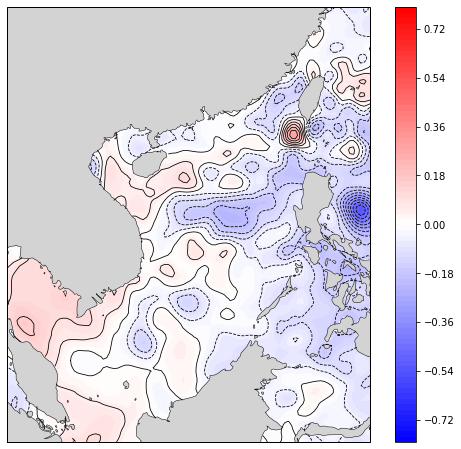

In [48]:
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
                                   edgecolor='black', facecolor='lightgray', linewidth=0.5)

fig = plt.figure(figsize=(9, 8))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent([100, 125, 0, 30], crs=ccrs.PlateCarree())
#ax.coastlines(resolution='50m')
ax.add_feature(land_50m)

levels1 = np.arange(-0.8, 0.81, 0.02)
levels2 = np.arange(-0.8, 0.81, 0.05)

h1 = ax.contourf(ds.longitude, ds.latitude, ds.sla[0, :, :], levels=levels1, cmap='bwr')
ax.contour(ds.longitude, ds.latitude, ds.sla[0, :, :], levels=levels2, colors='k', linewidths=0.8)

plt.colorbar(h1)